In [103]:
##################################
### Import the usual libraries ###
##################################

import numpy as np

import astropy
from astropy.io import fits, ascii
from astropy.table import Table, vstack, Column
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
import astropy.units as u

import pandas as pd

import matplotlib
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams.update({'font.size': 16}) #make plots more readable

import MagellanicStream as ms
import astropy.units as u
from astropy.coordinates import SkyCoord
from uncertainties import ufloat

import warnings
warnings.filterwarnings('ignore')

##############################
### User defined functions ###
##############################

def dups(data):
    list_data = list(data)
    keys = []
    values = []
    not_uniq = list(set([x for x in list_data if list_data.count(x)>1]))
    for i in range(len(not_uniq)):
        keys.append(not_uniq[i])
        values.append(np.where(data==not_uniq[i]))
    idx = dict(zip(keys, values))
    return not_uniq, idx

def absmag(magnitude,distance,par):
    ''' !!! Parallax must have units of mas and distances must have units of kpc!!! '''
    absm = []
    if par == True: #if distance is given as parallax
        dist = np.reciprocal(distance)*1000
        absm.append(magnitude-5.0*np.log10(dist)+5.0)
        absm = np.squeeze(np.array(absm))
    else: #if distance is given as distance
        absm.append(magnitude-5.0*np.log10(distance*1000)+5.0)
        absm = np.squeeze(np.array(absm))
    return absm

# def dist2LMC(ra, dec):
#     ra1 = np.copy(ra)
#     dec1 = np.copy(dec)
#     ra1 *= np.pi/180
#     dec1 *= np.pi/180
#     alph0 = 81.9*np.pi/180 #ra of LMC center
#     delt0 = -69.866667*np.pi/180 #dec of LMC center
#     sd = np.sin(delt0)
#     cd = np.cos(delt0)
#     d0 = 49.9
#     iota = 27.81*np.pi/180 #inclination
#     pa = 146.37*np.pi/180  #position angle of line-of-nodes
#     rho = np.arccos(cd*np.cos(dec1)*np.cos(ra1 - alph0) + sd*np.sin(dec1))
#     phi = np.arccos(-np.cos(dec1)*np.sin(ra1 - alph0)*(1/np.sin(rho)))
#     dis = d0*(np.cos(iota)/(np.cos(iota)*np.cos(rho)-np.sin(iota)*np.sin(rho)*np.sin(phi - pa)))
#     rho *= (180/np.pi)
#     phi *= (180/np.pi)    
#     return rho, phi, dis

def mad(dat):
    return np.median(np.absolute(dat - np.median(dat)))

#######################
### Age of Universe ###
#######################

'''
@article{riess2019large,
  title={Large Magellanic Cloud Cepheid Standards Provide a 1\% Foundation for the Determination of the Hubble Constant and Stronger Evidence for Physics Beyond LambdaCDM},
  author={Riess, Adam G and Casertano, Stefano and Yuan, Wenlong and Macri, Lucas M and Scolnic, Dan},
  journal={arXiv preprint arXiv:1903.07603},
  year={2019}
}
'''

#Value 74.03 \pm 1.42 (km/s)/Mpc

H0 = 74.03*(u.km/u.s)/u.Mpc
hertz = H0.to(u.km/u.s/u.pc).to(u.km/u.s/u.km)
tage = (1/hertz).to(u.yr)
ageU = tage.value

In [104]:
#########################
### Import fits files ###
#########################

#isochrone website http://stev.oapd.inaf.it/cgi-bin/cmd

#filepath1 = '/Users/joshpovick/Desktop/Research/Magellanic_Ages/linearisochrones.dat' 
filepath2 = '/Users/joshpovick/Desktop/Research/Magellanic_Ages/logisochrones.dat' 

#lineariso = ascii.read(filepath1, format='basic', delimiter='\s')
logiso = ascii.read(filepath2, format='basic', delimiter='\s')

#lineariso = Table(lineariso)
logiso = Table(logiso)

''' Ages used 8 to 10.1 steps 0.15'''
''' Metallicity used -2.6 to 0.1 steps 0.099'''

# ### Merge both files and create a fits file
# lineariso['sample'] = 0
# logiso['sample'] = 1

# parsec = vstack([lineariso,logiso])
# parsec.write('/Users/joshpovick/Desktop/Research/Magellanic_Ages/parsec.fits',format='fits',overwrite=True)

' Metallicity used -2.6 to 0.1 steps 0.099'

In [105]:
set(np.log10(logiso['Zini']/0.02))
#print(set(10**logiso['logAge']))

{-2.7065159040454176,
 -2.6078044450818494,
 -2.5090868416891015,
 -2.4103742865131768,
 -2.311660280677828,
 -2.2129293610213217,
 -2.1142431189307325,
 -2.0155176935977375,
 -1.9168020664869305,
 -1.8180849879152912,
 -1.7193647289463654,
 -1.6206582170010229,
 -1.5219387918184821,
 -1.4232268739688458,
 -1.3245103676899708,
 -1.226030809599782,
 -1.1275814809196667,
 -1.0291419430034978,
 -0.9311279756399619,
 -0.8332591526254643,
 -0.735406463024618,
 -0.6378475183581431,
 -0.5404793539612457,
 -0.4440173059474202,
 -0.3481746159511458,
 -0.25289906863501377,
 -0.15785900246380286,
 -0.06489597884855043}

In [106]:
# ##################################
# ### Checking Metallicity Range ###
# ##################################

# print(np.log10(max(parsec['Zini'])/0.02))
# print(np.log10(min(parsec['Zini'])/0.02))

Columns in PARSEC fits files:

'Zini','logAge','Mini','int_IMF','Mass',
'logL','logTe','logg','label','McoreTP',
'C_O','period0','period1','pmode','Mloss',
'tau1m','X','Y','Xc','Xn','Xo','Cexcess',
'Z','mbolmag','umag','gmag','rmag','imag',
'zmag','Jmag','Hmag','Ksmag','SAMPLE'

Labels for PARSEC isochrones

0 = PMS, pre main sequence

1 = MS, main sequence

2 = SGB, subgiant branch, or Hertzsprung gap for more intermediate+massive stars

3 = RGB, red giant branch, or the quick stage of red giant for intermediate+massive stars

4 = CHEB, core He-burning for low mass stars, or the very initial stage of CHeB for intermediate+massive stars

5 = still CHEB, the blueward part of the Cepheid loop of intermediate+massive stars

6 = still CHEB, the redward part of the Cepheid loop of intermediate+massive stars

7 = EAGB, the early asymptotic giant branch, or a quick stage of red giant for massive stars

8 = TPAGB, the thermally pulsing asymptotic giant branch

9 = post-AGB (in preparation!)



In [107]:
'''OBSOLETE NOW'''
# ####################################
# Mass-Age Relation for RGB Stars ###
# ####################################

# colmap = 'jet'

# rgby = np.where(young['LABEL']==3)
# rgbo = np.where(old['LABEL']==3)

# #Young
# plt.figure(figsize=[10,10])
# plt.scatter(10**young['MASS'][rgby],10**(young['LOGAGE'][rgby]),c=np.log10(young['ZINI'][rgby]/0.02),cmap=colmap)
# plt.xscale('log')
# plt.yscale('log')
# plt.axhline(ageU,c='k')
# plt.colorbar()
# plt.xlabel(r'Mass $(M_{\odot})$')
# plt.ylabel(r'Age $(yr)$')
# plt.title(r'Mass-Age Relationship for PARSEC Isochrones Young (Color as $[Fe/H]$)')
# plt.show()

# #Old
# plt.figure(figsize=[10,10])
# plt.scatter(10**old['MASS'][rgbo],10**(old['LOGAGE'][rgbo]),c=np.log10(old['ZINI'][rgbo]/0.02),cmap=colmap)
# plt.xscale('log')
# plt.yscale('log')
# plt.axhline(ageU,c='k')
# plt.colorbar()
# plt.xlabel(r'Mass $(M_{\odot})$')
# plt.ylabel(r'Age $(yr)$')
# plt.title(r'Mass-Age Relationship for PARSEC Isochrones Old (Color as $[Fe/H]$)')
# plt.show()

'OBSOLETE NOW'

In [108]:
'''OBSOLETE NOW'''

# ###############################
# ### Merge Both PARSEC Files ###
# ###############################

# '''All further cells should use the merged PARSEC files'''

# young['SAMPLE'] = 0
# old['SAMPLE'] = 1

# monarch = vstack([young,old])
# monarch.write('/Users/joshpovick/Desktop/Research/Magellanic_Ages/monarch.fits',format='fits',overwrite=True)

'OBSOLETE NOW'

In [109]:
'''OBSOLETE NOW'''

# #######################################
# ### Mass-Age Relation for RGB Stars ###
# #######################################

# colmap = 'jet'

# rgb = np.where(parsec['label']==3)

# plt.figure(figsize=[10,8])
# plt.scatter(10**parsec['Mass'][rgb],10**(parsec['logAge'][rgb]),c=np.log10(parsec['Zini'][rgb]/0.02),cmap=colmap)
# #plt.scatter(10**monarch['MASS'][rgb],10**(monarch['LOGAGE'][rgb]),c=monarch['LOGTE'][rgb],cmap=colmap)
# plt.xscale('log')
# plt.yscale('log')
# #plt.axhline(ageU,c='k')
# plt.colorbar()
# plt.xlabel(r'Mass $(M_{\odot})$')
# plt.ylabel(r'Age $(yr)$')
# plt.title(r'Mass-Age Relationship for PARSEC Isochrones (Color as $[Fe/H]$)')
# plt.savefig('mass_age_parsec.pdf',bbox_inches='tight')
# plt.show()

'OBSOLETE NOW'

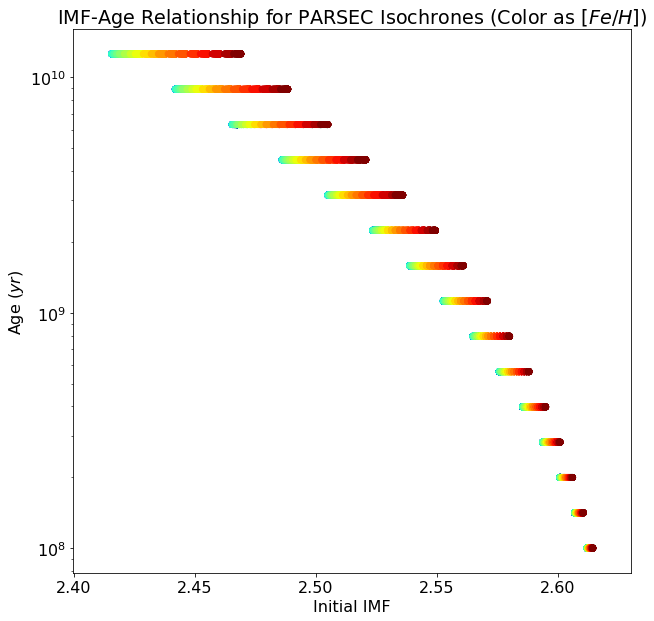

In [110]:
######################################
### Mass-Age Relation with INT_IMF ###
######################################

rgb = np.where(logiso['label']==3)

plt.figure(figsize=[10,10])
#plt.scatter(10**monarch['MASS'][rgb],10**(monarch['LOGAGE'][rgb]),c=np.log10(monarch['ZINI'][rgb]/0.02),cmap=colmap)
plt.scatter(logiso['int_IMF'][rgb],10**(logiso['logAge'][rgb]),c=np.log10(logiso['Zini'][rgb]/0.02),cmap='jet')
#plt.xscale('log')
plt.yscale('log')
#plt.axhline(ageU,c='k')
#plt.colorbar()
plt.xlabel(r'Initial IMF')
plt.ylabel(r'Age $(yr)$')
plt.title(r'IMF-Age Relationship for PARSEC Isochrones (Color as $[Fe/H]$)')
plt.show()

In [111]:
set(logiso['logAge'])

{8.0,
 8.15,
 8.3,
 8.45,
 8.6,
 8.75,
 8.9,
 9.05,
 9.2,
 9.35,
 9.5,
 9.65,
 9.8,
 9.95,
 10.1}

In [112]:
'''OBSOLETE NOW'''

# ############################################
# ### Find all the different metallicities ###
# ############################################

# mets, metsidx = dups(parsec[rgb]['Zini'])

'OBSOLETE NOW'

In [113]:
'''OBSOLETE NOW'''

# ###################################################
# ### Mass-Age Relationship for all Metallicities ###
# ###################################################

# from scipy.optimize import curve_fit
# matplotlib.cm.ScalarMappable(norm=None, cmap=None)

# colmap = 'jet'
# rgb = np.where(parsec['label']==3)

# def model(x, a, b, c): 
#     return (a*(x**2)+b*(x)+c)

# polynom = []
# plt.figure(figsize=[10,10])
# for i in range(len(mets)):
#     which = np.where(parsec[rgb]['Zini']==mets[i])
#     x = np.linspace(min(parsec[rgb][which]['Mass']),max(parsec[rgb][which]['Mass']),100)
#     y = np.linspace(min(parsec[rgb][which]['logAge']),max(parsec[rgb][which]['logAge']),100)
#     popt, pcov = curve_fit(model,x,y)
#     polynom.append(popt)
#     plt.plot(x[::-1],popt[0]*x**2+popt[1]*x+popt[2],label='[Fe/H] = {}'.format(round(np.log10(mets[i]/0.02),2)))
    
# #plt.legend()
# plt.xlabel(r'Log(Mass) $[M_{\odot}]$')
# plt.ylabel(r'Log(Age) $[yr]$')
# plt.title(r'Mass-Age Relationship for PARSEC Isochrones (Color as $[Fe/H]$)')
# plt.show()

# Table(polynom).write('/Users/joshpovick/Desktop/Research/Magellanic_Ages/massage.fits',format='fits',overwrite=True)


'OBSOLETE NOW'

In [114]:
'''OBSOLETE NOW'''

# #############################################
# ### Mass Age Relationship for linear ages ###
# #############################################

# rgb = np.where(lineariso['label']==3)
# metslin, metsidxlin = dups(lineariso[rgb]['Zini'])

# colmap = 'jet'


# def model(x, a, b, c): 
#     return (a*(x**2)+b*(x)+c)

# polynom = []
# plt.figure(figsize=[10,10])
# for i in range(len(metslin)):
#     which = np.where(lineariso[rgb]['Zini']==metslin[i])
#     x = np.linspace(min(lineariso[rgb][which]['Mass']),max(lineariso[rgb][which]['Mass']),100)
#     y = np.linspace(min(lineariso[rgb][which]['logAge']),max(lineariso[rgb][which]['logAge']),100)
#     popt, pcov = curve_fit(model,x,y)
#     polynom.append(popt)
#     plt.plot(x[::-1],popt[0]*x**2+popt[1]*x+popt[2],label='[Fe/H] = {}'.format(round(np.log10(metslin[i]/0.02),2)))
    
# plt.legend()
# plt.xlabel(r'Log(Mass) $[M_{\odot}]$')
# plt.ylabel(r'Log(Age) $[yr]$')
# plt.title(r'Mass-Age Relationship for PARSEC Isochrones (Color as $[Fe/H]$)')
# plt.show()

'OBSOLETE NOW'

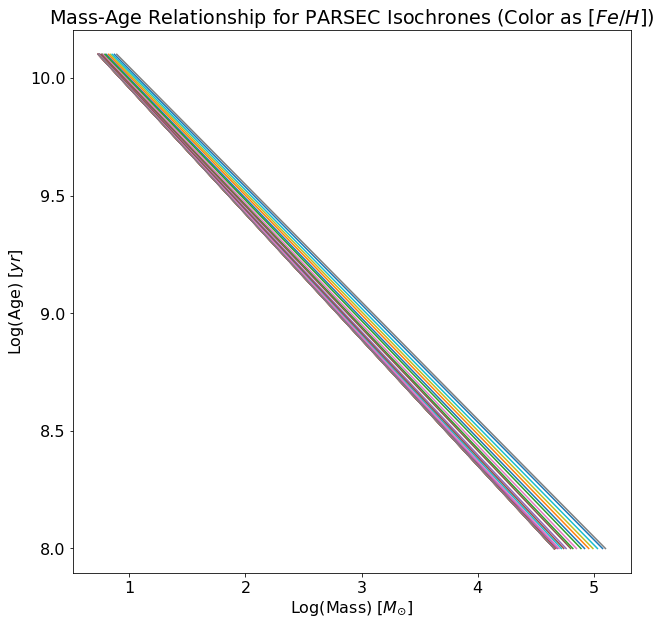

In [115]:
##########################################
### Mass Age Relationship for log ages ###
##########################################

from scipy.optimize import curve_fit

colmap = 'jet'
rgb = np.where(logiso['label']==3)

metslog, metsidxlog = dups(logiso[rgb]['Zini'])

def model(x, a, b, c): 
    return (a*(x**2)+b*(x)+c)

polynom = []
plt.figure(figsize=[10,10])
for i in range(len(metslog)):
    which = np.where(logiso[rgb]['Zini']==metslog[i])
    x = np.linspace(min(logiso[rgb][which]['Mass']),max(logiso[rgb][which]['Mass']),100)
    y = np.linspace(min(logiso[rgb][which]['logAge']),max(logiso[rgb][which]['logAge']),100)
    popt, pcov = curve_fit(model,x,y)
    polynom.append(popt)
    plt.plot(x[::-1],popt[0]*x**2+popt[1]*x+popt[2],label='[Fe/H] = {}'.format(round(np.log10(metslog[i]/0.02),2)))
    

plt.xlabel(r'Log(Mass) $[M_{\odot}]$')
plt.ylabel(r'Log(Age) $[yr]$')
plt.title(r'Mass-Age Relationship for PARSEC Isochrones (Color as $[Fe/H]$)')
#plt.savefig('mass_age_parsec.pdf',bbox_inches='tight')
plt.show()

polynom = Table(polynom)
polynom.write('/Users/joshpovick/Desktop/Research/Magellanic_Ages/polynom.fits',format='fits',overwrite=True)

In [116]:
polynom.show_in_browser(jsviewer=True)

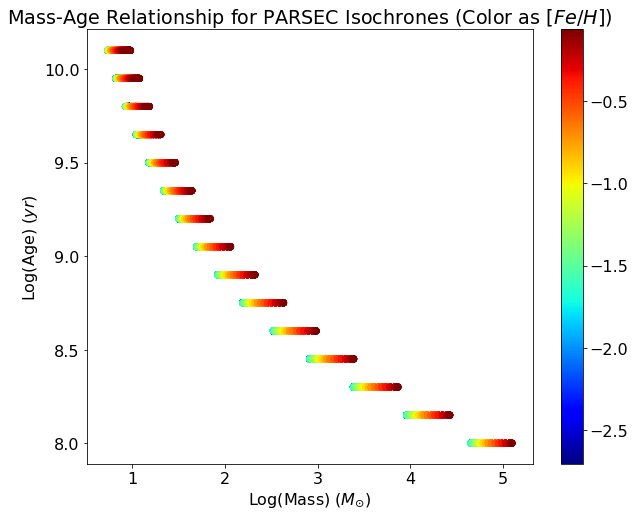

In [117]:
colmap = 'jet'

rgb = np.where(logiso['label']==3)

plt.figure(figsize=[10,8])
plt.scatter(logiso['Mass'][rgb],(logiso['logAge'][rgb]),c=np.log10(logiso['Zini'][rgb]/0.02),cmap=colmap)
#plt.xscale('log')
#plt.yscale('log')
#plt.axhline(ageU,c='k')
plt.colorbar()
plt.xlabel(r'Log(Mass) $(M_{\odot})$')
plt.ylabel(r'Log(Age) $(yr)$')
plt.title(r'Mass-Age Relationship for PARSEC Isochrones (Color as $[Fe/H]$)')
plt.savefig('mass_age_parsec.pdf',bbox_inches='tight')
plt.show()

In [118]:
logiso.columns

<TableColumns names=('Zini','logAge','Mini','int_IMF','Mass','logL','logTe','logg','label','McoreTP','C_O','period0','period1','pmode','Mloss','tau1m','X','Y','Xc','Xn','Xo','Cexcess','Z','mbolmag','Jmag','Hmag','Ksmag')>

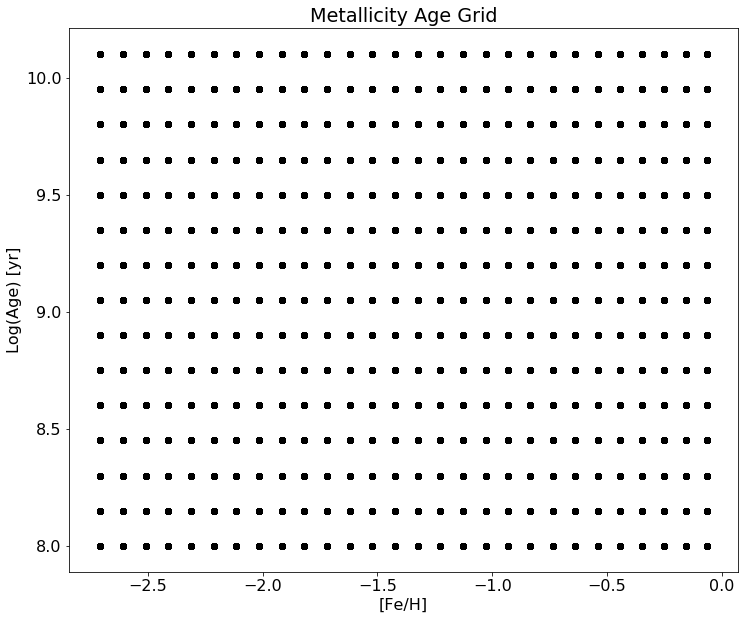

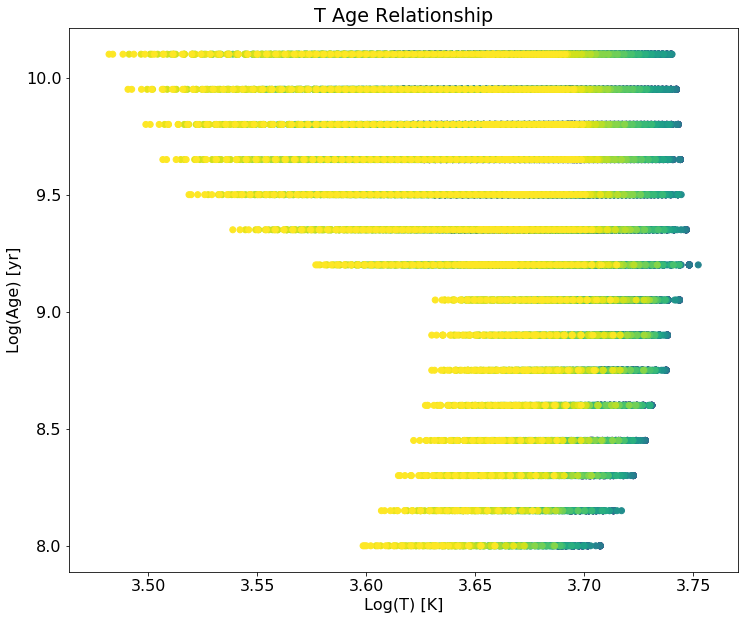

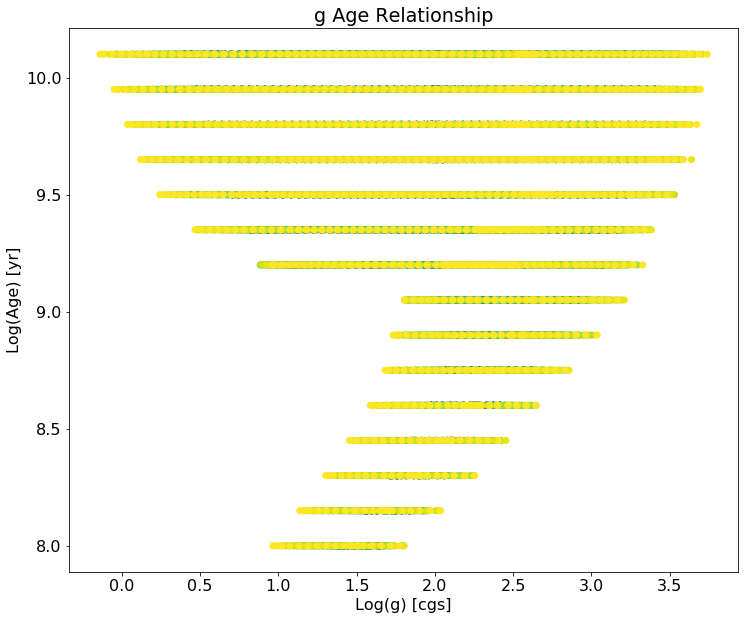

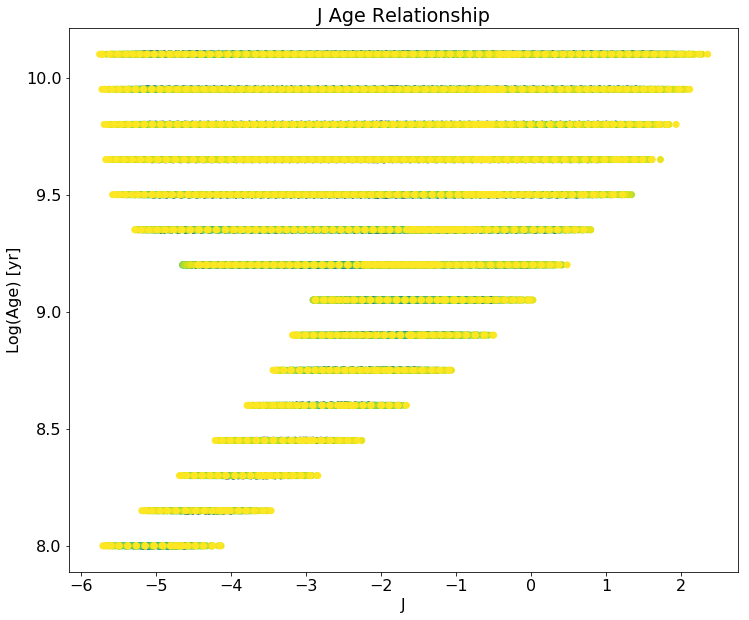

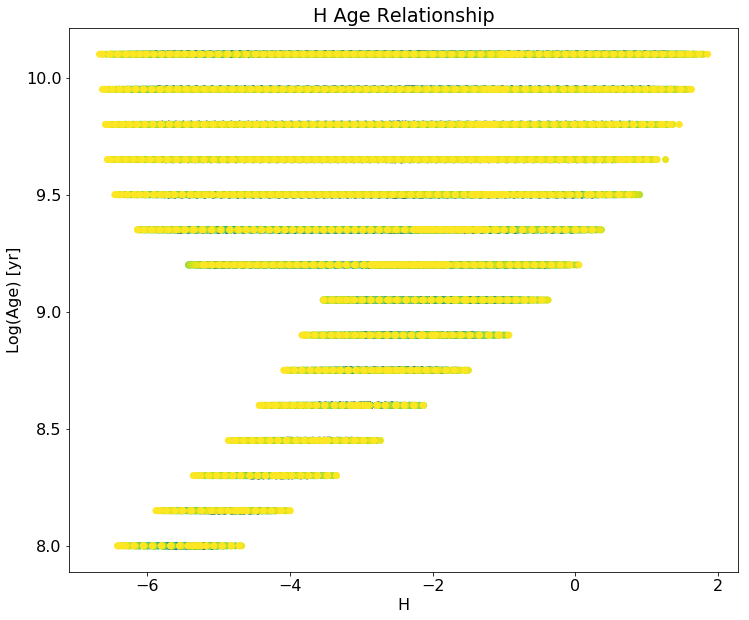

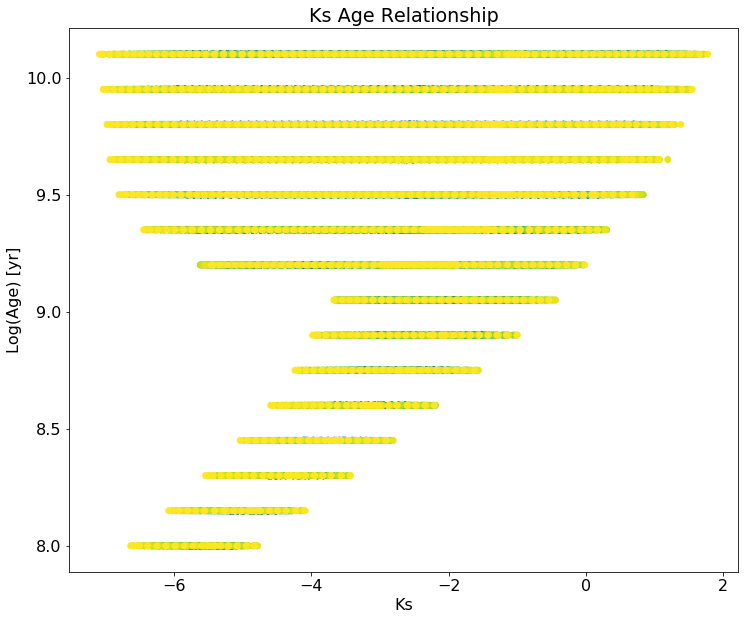

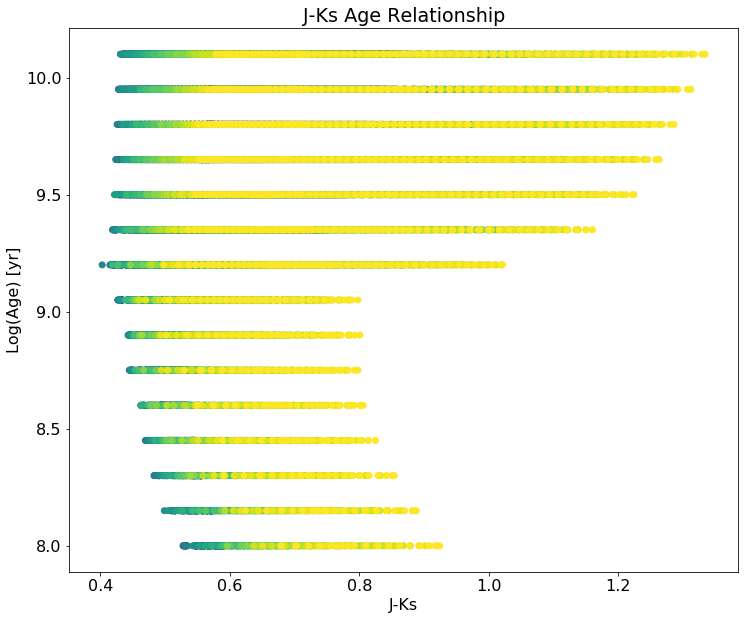

In [119]:
###################################
### Different Age Relationships ###
###################################

#Metallicity Age
plt.figure(figsize=[12,10])
# plt.scatter(np.log10(logiso['Zini']/0.02)[rgb],logiso['logAge'][rgb],c=np.log10(logiso['Zini']/0.02)[rgb],cmap='jet')
plt.scatter(np.log10(logiso['Zini']/0.02)[rgb],logiso['logAge'][rgb],c='k',cmap='jet')
plt.ylabel(r'Log(Age) [yr]')
plt.xlabel(r'[Fe/H]')
plt.title(r'Metallicity Age Grid')
plt.savefig('PARSECgrid.pdf',bbox_inches='tight')
plt.show()

#T Age 
plt.figure(figsize=[12,10])
plt.scatter(logiso['logTe'][rgb],logiso['logAge'][rgb],c=np.log10(logiso['Zini']/0.02)[rgb])
plt.title(r'T Age Relationship')
plt.ylabel(r'Log(Age) [yr]')
plt.xlabel(r'Log(T) [K]')
plt.show()

#logg Age 
plt.figure(figsize=[12,10])
plt.scatter(logiso['logg'][rgb],logiso['logAge'][rgb],c=np.log10(logiso['Zini']/0.02)[rgb])
plt.title(r'g Age Relationship')
plt.ylabel(r'Log(Age) [yr]')
plt.xlabel(r'Log(g) [cgs]')
plt.show()

#J Age 
plt.figure(figsize=[12,10])
plt.scatter(logiso['Jmag'][rgb],logiso['logAge'][rgb],c=np.log10(logiso['Zini']/0.02)[rgb])
plt.title(r'J Age Relationship')
plt.ylabel(r'Log(Age) [yr]')
plt.xlabel(r'J')
plt.show()

#H Age 
plt.figure(figsize=[12,10])
plt.scatter(logiso['Hmag'][rgb],logiso['logAge'][rgb],c=np.log10(logiso['Zini']/0.02)[rgb])
plt.title(r'H Age Relationship')
plt.ylabel(r'Log(Age) [yr]')
plt.xlabel(r'H')
plt.show()

#Ks Age 
plt.figure(figsize=[12,10])
plt.scatter(logiso['Ksmag'][rgb],logiso['logAge'][rgb],c=np.log10(logiso['Zini']/0.02)[rgb])
plt.title(r'Ks Age Relationship')
plt.ylabel(r'Log(Age) [yr]')
plt.xlabel(r'Ks')
plt.show()

#J-Ks Age
#J Age 
plt.figure(figsize=[12,10])
plt.scatter((logiso['Jmag']-logiso['Ksmag'])[rgb],logiso['logAge'][rgb],c=np.log10(logiso['Zini']/0.02)[rgb])
plt.title(r'J-Ks Age Relationship')
plt.ylabel(r'Log(Age) [yr]')
plt.xlabel(r'J-Ks')
plt.show()

In [120]:
###############################
### Import LinearRegression ###
###############################

#from sklearn import linear_model as lm 
import statsmodels.api as sm 

rgb = np.where(logiso['label']==3)

####################
### Prepare Data ###
####################

'''parameters: logTe, Hmag, [FE/H], logg'''\

clnr = np.where(logiso[rgb]['logg']<2.5)

logage = np.array(logiso[rgb]['logAge'].data)

J = np.array(logiso[rgb]['Jmag'].data)
Ks = np.array(logiso[rgb]['Ksmag'].data)

logteff = np.array(logiso[rgb]['logTe'].data)
H = np.array(logiso[rgb]['Hmag'].data)
feh = np.array(np.log10(logiso[rgb]['Zini'].data/0.02))
logg = np.array(logiso[rgb]['logg'].data)

logteff,H,feh,logg:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 3.133e+05
Date:                Wed, 17 Jul 2019   Prob (F-statistic):               0.00
Time:                        15:10:13   Log-Likelihood:                 22024.
No. Observations:               16121   AIC:                        -4.404e+04
Df Residuals:                   16116   BIC:                        -4.400e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5838      0.171

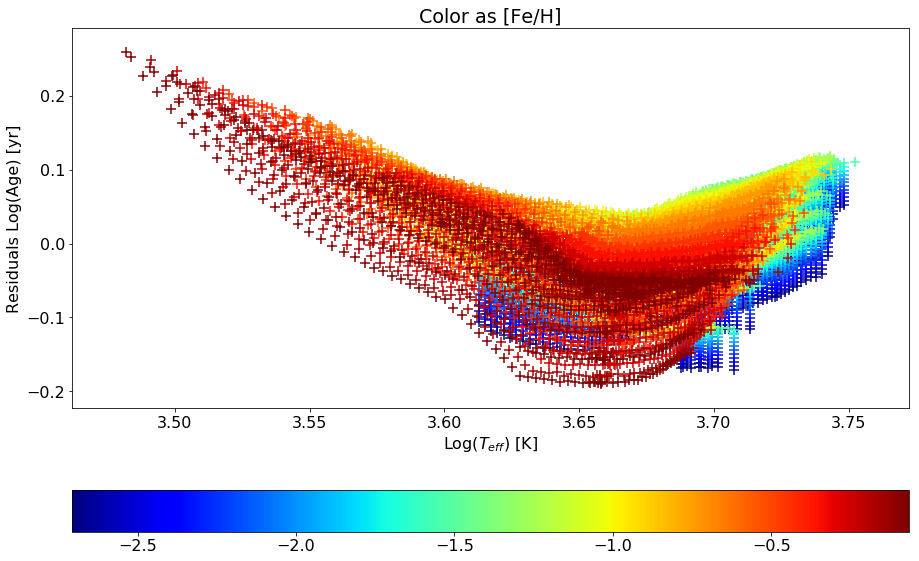

In [121]:
# #####################
# ### Linear Models ###
# #####################

#Everything
lin = np.array([logteff,H,feh,logg]).T
lin = sm.add_constant(lin)
  
model = sm.OLS(logage, lin).fit()
predictions = model.predict(lin) 

print_model = model.summary()
print(r'logteff,H,feh,logg:')
print(print_model)
print(model.params)
print(' ')

plt.figure(figsize=[15,10])
plt.scatter(logteff,model.predict(lin)-logage,c=feh,marker='+',s=100,cmap='jet')
plt.colorbar(orientation='horizontal')
plt.title(r'Color as [Fe/H]')
plt.xlabel(r'Log($T_{eff})$ [K]')
plt.ylabel(r'Residuals Log(Age) [yr]')
plt.show()

# #All Linear without feh
# lin = np.array([logteff,H,logg]).T
# lin = sm.add_constant(lin)
  
# model = sm.OLS(logage, lin).fit()
# predictionslinevery = model.predict(lin) 

# print_model = model.summary()
# print(r'logteff,H,logg:')
# print(print_model)
# print(' ')

# #All Linear without logg
# lin = np.array([logteff,H,feh]).T
# lin = sm.add_constant(lin)
  
# model = sm.OLS(logage, lin).fit()
# predictionslinlogg = model.predict(lin) 

# print_model = model.summary()
# print(r'logteff,H,feh:')
# print(print_model)
# print(' ')

# #Color instead of temp
# lin = np.array([(J-Ks),H,feh,logg]).T
# lin = sm.add_constant(lin)
  
# model = sm.OLS(logage, lin).fit()
# predictionslinJKs = model.predict(lin) 

# print_model = model.summary()
# print(r'J-Ks,H,feh,logg:')
# print(print_model)
# print(' ')

In [122]:
# ###################################
# ### Models with Quadratic Terms ###
# ###################################

# #teff**2
# qua = np.array([logteff,H,feh,logg,logteff**2]).T
# qua = sm.add_constant(qua)
  
# model = sm.OLS(logage, qua).fit()
# predictionsquateff = model.predict(qua) 

# print_model = model.summary()
# print(r'logteff,H,feh,logg,logteff**2:')
# print(print_model)
# print(' ')

# #H**2
# qua = np.array([logteff,H,feh,logg,H**2]).T
# qua = sm.add_constant(qua)
  
# model = sm.OLS(logage, qua).fit()
# predictionsquaH = model.predict(qua) 

# print_model = model.summary()
# print(r'logteff,H,feh,logg,H**2:')
# print(print_model)
# print(' ')

# #feh**2
# qua = np.array([logteff,H,feh,logg,feh**2]).T
# qua = sm.add_constant(qua)
  
# model = sm.OLS(logage, qua).fit()
# predictionsquafeh = model.predict(qua) 

# print_model = model.summary()
# print(r'logteff,H,feh,logg,feh**2:')
# print(print_model)
# print(' ')

# #J-Ks**2
# qua = np.array([J-Ks,H,feh,logg,(J-Ks)**2]).T
# qua = sm.add_constant(qua)
  
# model = sm.OLS(logage, qua).fit()
# predictionsquaJKs = model.predict(qua) 

# print_model = model.summary()
# print(r'logteff,H,feh,logg,(J-Ks)**2:')
# print(print_model)
# print(' ')

In [123]:
# ########################
# ### Cubic and Beyond ###
# ########################

# #Carrera Like 
# car = np.array([J-Ks,H,feh,(J-Ks)**2,feh**2,(J-Ks)**3]).T
# car = sm.add_constant(car)
  
# model = sm.OLS(logage, car).fit()
# predictionsquaJKs = model.predict(car) 

# print_model = model.summary()
# print(r'J-Ks,H,feh,(J-Ks)**2,feh**2,(J-Ks)**3:')
# print(print_model)
# print(' ')

# #Carrera Like with logg
# car = np.array([J-Ks,H,feh,(J-Ks)**2,feh**2,(J-Ks)**3,logg]).T
# car = sm.add_constant(car)
  
# model = sm.OLS(logage, car).fit()
# predictionsqualogg = model.predict(car) 

# print_model = model.summary()
# print(r'J-Ks,H,feh,(J-Ks)**2,feh**2,(J-Ks)**3,logg:')
# print(print_model)
# print(' ')

# #Carrera Like with logg no feh
# car = np.array([J-Ks,H,(J-Ks)**2,(J-Ks)**3,logg]).T
# car = sm.add_constant(car)
  
# model = sm.OLS(logage, car).fit()
# predictionsqualogg = model.predict(car) 

# print_model = model.summary()
# print(r'J-Ks,H,(J-Ks)**2,(J-Ks)**3,logg:')
# print(print_model)
# print(' ')

# #Carrera Like teff
# car = np.array([logteff,H,feh,(logteff)**2,feh**2]).T
# car = sm.add_constant(car)
  
# model = sm.OLS(logage, car).fit()
# predictionscarteff = model.predict(car) 

# print_model = model.summary()
# print(r'logteff,H,feh,(logteff)**2,feh**2:')
# print(print_model)
# print(' ')

teff k and feh

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 3.133e+05
Date:                Wed, 17 Jul 2019   Prob (F-statistic):               0.00
Time:                        15:10:14   Log-Likelihood:                 22024.
No. Observations:               16121   AIC:                        -4.404e+04
Df Residuals:                   16116   BIC:                        -4.400e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5838      0.171     38.496      0.0

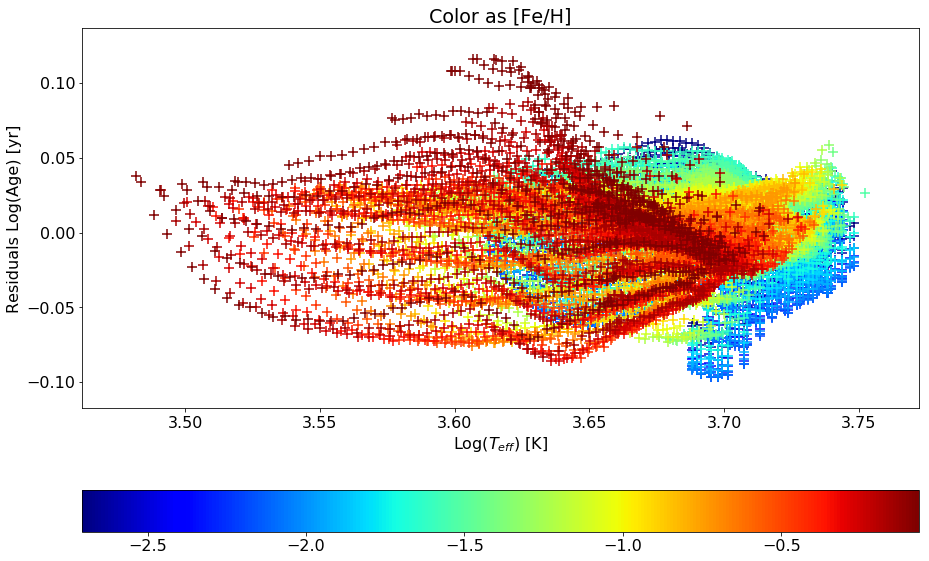

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 4.862e+05
Date:                Wed, 17 Jul 2019   Prob (F-statistic):               0.00
Time:                        15:10:15   Log-Likelihood:                 33645.
No. Observations:               16121   AIC:                        -6.727e+04
Df Residuals:                   16109   BIC:                        -6.717e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        940.2838     74.734     12.582      0.0

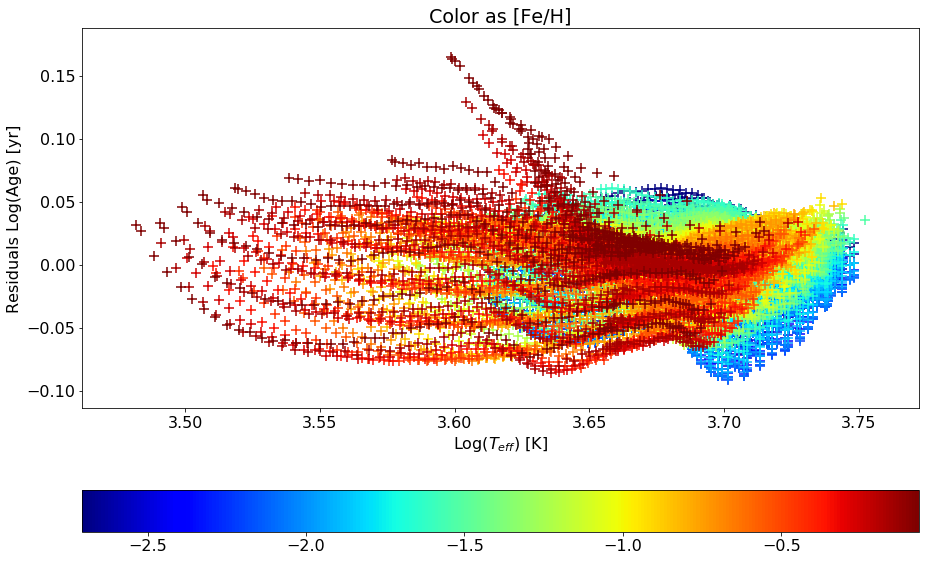

In [124]:
####################
### Stuff To Try ###
####################

#no cross terms constant + linear + quads + cubs
test1 = np.array([logteff,Ks,feh,logg,logteff**2,Ks**2,feh**2,logg**2,logteff**3,Ks**3,feh**3,logg**3]).T
test1 = sm.add_constant(test1)
  
model1 = sm.OLS(logage, test1).fit()
predictions1 = model1.predict(test1) 

print_model1 = model.summary()
print(print_model1)

print(' ')
residual1 = predictions1 - logage
print(model1.params)
print(r'Reduced chi squared: '+str(sum(residual1**2)/len(test1.T)))

plt.figure(figsize=[15,10])
plt.scatter(logteff,residual1,c=feh,marker='+',s=100,cmap='jet')
plt.colorbar(orientation='horizontal')
plt.title(r'Color as [Fe/H]')
plt.xlabel(r'Log($T_{eff})$ [K]')
plt.ylabel(r'Residuals Log(Age) [yr]')
plt.show()

#no cross terms constant + linear + quads + cubs no Ks**3
test2 = np.array([logteff,Ks,feh,logg,logteff**2,Ks**2,feh**2,logg**2,logteff**3,feh**3,logg**3]).T
test2 = sm.add_constant(test2)
  
model2 = sm.OLS(logage, test2).fit()
predictions2 = model2.predict(test2) 

print_model2 = model2.summary()
print(print_model2)

print(' ')
residual2 = predictions2 - logage
print(r'Reduced chi squared: '+str(sum(residual2**2)/len(test2.T)))

plt.figure(figsize=[15,10])
plt.scatter(logteff,residual2,c=feh,marker='+',s=100,cmap='jet')
plt.colorbar(orientation='horizontal')
plt.title(r'Color as [Fe/H]')
plt.xlabel(r'Log($T_{eff})$ [K]')
plt.ylabel(r'Residuals Log(Age) [yr]')
plt.show()

                            GLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            GLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.375e+06
Date:                Wed, 17 Jul 2019   Prob (F-statistic):               0.00
Time:                        15:10:16   Log-Likelihood:                 37491.
No. Observations:               11943   AIC:                        -7.496e+04
Df Residuals:                   11931   BIC:                        -7.487e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        452.2712      3.407    132.736      0.0

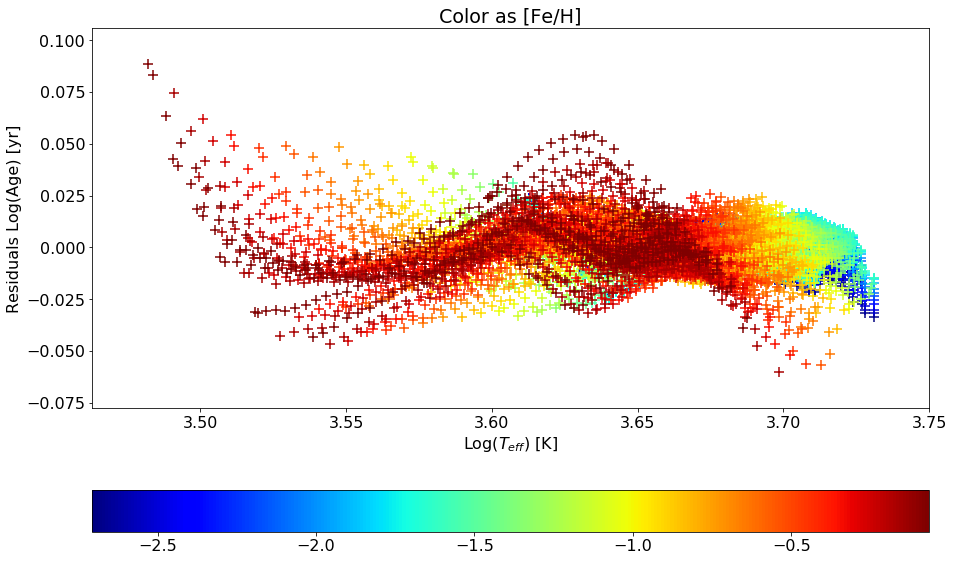

0.009169627643354852
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.375e+06
Date:                Wed, 17 Jul 2019   Prob (F-statistic):               0.00
Time:                        15:10:17   Log-Likelihood:                 37491.
No. Observations:               11943   AIC:                        -7.496e+04
Df Residuals:                   11931   BIC:                        -7.487e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        452.2712      3.40

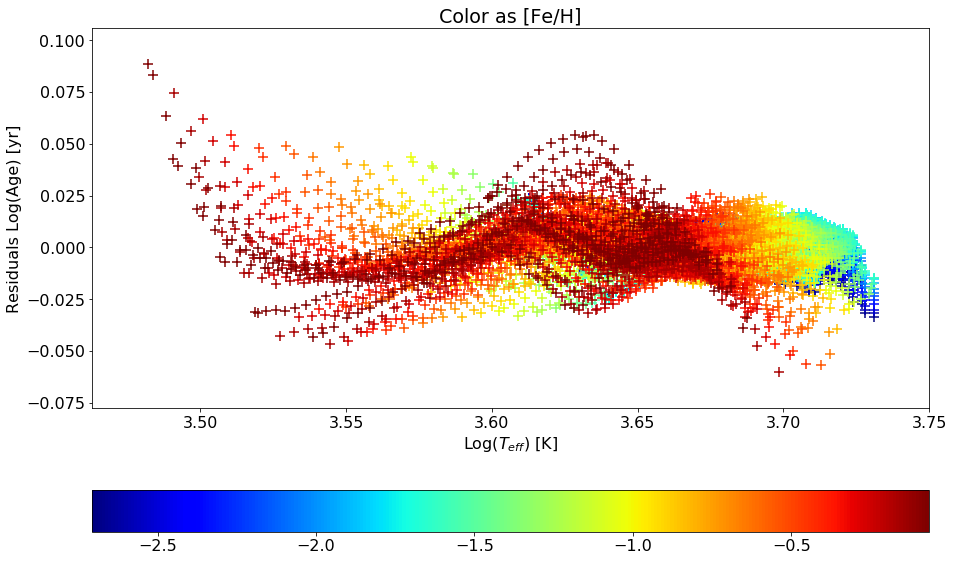

In [125]:
##########################
### David and Modified ###
##########################

#without logg over 2.5

clnr = np.where((logiso['logg']<2.5)&(logiso['label']==3))

glogage = np.array(logiso[clnr]['logAge'].data)

gJ = np.array(logiso[clnr]['Jmag'].data)
gKs = np.array(logiso[clnr]['Ksmag'].data)

glogteff = np.array(logiso[clnr]['logTe'].data)
gH = np.array(logiso[clnr]['Hmag'].data)
gfeh = np.array(np.log10(logiso[clnr]['Zini'].data/0.02))
glogg = np.array(logiso[clnr]['logg'].data)

david1 = np.array([glogteff,gKs,gfeh,glogg,np.multiply(glogteff,gKs),np.multiply(glogteff,gfeh),\
                   np.multiply(glogteff,glogg),np.multiply(gKs,glogg),\
                   glogteff**2,gKs**2,glogg**2]).T
david1 = sm.add_constant(david1)
modeldavid1 = sm.GLS(glogage, david1).fit()
predictionsdavid1 = modeldavid1.predict(david1) 

print_modeldavid1 = modeldavid1.summary()
print(print_modeldavid1)

print(' ')
residualdavid1 = predictionsdavid1 - glogage
print(r'Reduced chi squared: '+str(sum(residualdavid1**2)/(len(david1)-len(david1.T))))

plt.figure(figsize=[15,10])
plt.scatter(glogteff,residualdavid1,c=gfeh,marker='+',s=100,cmap='jet')
plt.colorbar(orientation='horizontal')
plt.title(r'Color as [Fe/H]')
plt.xlabel(r'Log($T_{eff})$ [K]')
plt.ylabel(r'Residuals Log(Age) [yr]')
plt.show()

print(np.median(np.absolute(residualdavid1-np.median(residualdavid1)))*1.4826)

#
david2 = np.array([glogteff,gKs,gfeh,glogg,np.multiply(glogteff,gKs),np.multiply(glogteff,gfeh),\
                   np.multiply(glogteff,glogg),np.multiply(gKs,glogg),\
                   glogteff**2,gKs**2,glogg**2]).T
david2 = sm.add_constant(david2)
modeldavid2 = sm.OLS(glogage, david2).fit()
predictionsdavid2 = modeldavid2.predict(david2) 

print_modeldavid2 = modeldavid2.summary()
print(print_modeldavid2)

print(' ')
residualdavid2 = predictionsdavid2 - glogage
print(r'Reduced chi squared: '+str(sum(residualdavid2**2)/(len(david2)-len(david2.T))))

print(r'Another Reduced chi squared: '+str(sum(residualdavid2**2/predictionsdavid2)))

print(r'G: ' +str(2*sum(glogage-np.log(glogage/predictionsdavid2))))

plt.figure(figsize=[15,10])
plt.scatter(glogteff,residualdavid2,c=gfeh,marker='+',s=100,cmap='jet')
plt.colorbar(orientation='horizontal')
plt.title(r'Color as [Fe/H]')
plt.xlabel(r'Log($T_{eff})$ [K]')
plt.ylabel(r'Residuals Log(Age) [yr]')
plt.savefig('PARSECresiduals.pdf',bbox_inches='tight')
plt.show()

In [126]:
print(max(residualdavid1))
print(min(residualdavid1))
print(max(residualdavid1)-min(residualdavid1))

0.08847772016760125
-0.060191215187000324
0.14866893535460157


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 5.326e+04
Date:                Wed, 17 Jul 2019   Prob (F-statistic):               0.00
Time:                        15:10:24   Log-Likelihood:                 9310.4
No. Observations:               11943   AIC:                        -1.861e+04
Df Residuals:                   11936   BIC:                        -1.856e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7474.6518    335.092     22.306      0.0

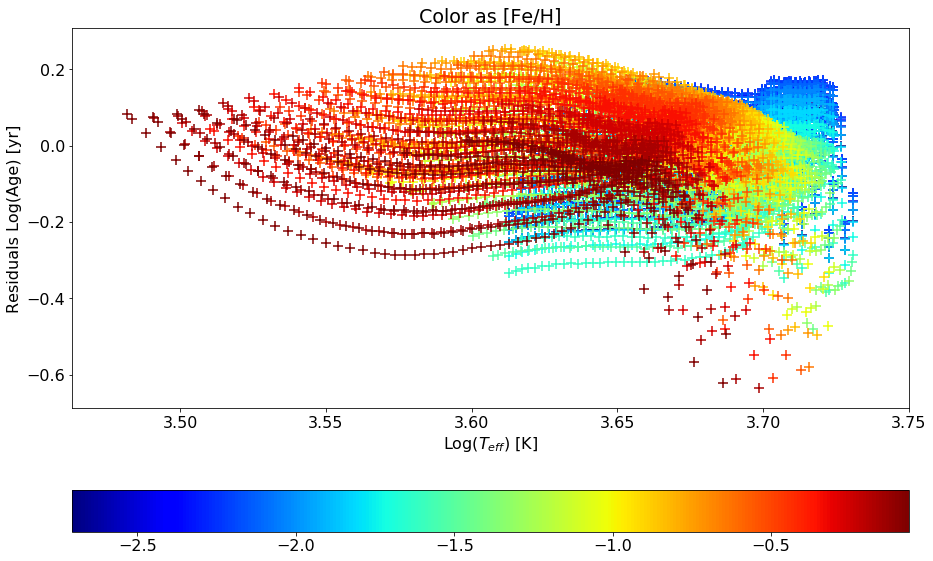

[ 7.47465179e+03 -6.27830024e+03  5.98663350e-01 -1.73972296e+00
  1.76656110e+03 -3.84878309e-01 -1.66228622e+02]


In [127]:
# carsmc = np.array([glogteff,gKs,gfeh,glogg,glogteff**2,gfeh**2]).T
carsmc = np.array([glogteff,gKs,gfeh,glogteff**2,gfeh**2,glogteff**3]).T
carsmc = sm.add_constant(carsmc)
modelcarsmc = sm.OLS(glogage, carsmc).fit()
predictionscarsmc = modelcarsmc.predict(carsmc) 

print_modelcarsmc = modelcarsmc.summary()
print(print_modelcarsmc)

print(' ')
residualcarsmc = predictionscarsmc - glogage
print(r'Reduced chi squared: '+str(sum(residualcarsmc**2)/(len(carsmc)-len(carsmc.T))))

print(r'Another Reduced chi squared: '+str(sum(residualcarsmc**2/predictionscarsmc)))

print(r'G: ' +str(2*sum(glogage-np.log(glogage/predictionscarsmc))))

plt.figure(figsize=[15,10])
plt.scatter(glogteff,residualcarsmc,c=gfeh,marker='+',s=100,cmap='jet')
plt.colorbar(orientation='horizontal')
plt.title(r'Color as [Fe/H]')
plt.xlabel(r'Log($T_{eff})$ [K]')
plt.ylabel(r'Residuals Log(Age) [yr]')
plt.show()
print(modelcarsmc.params)

In [128]:
print(max(residualcarsmc))
print(min(residualcarsmc))
print(max(residualcarsmc)-min(residualcarsmc))

0.2543419046094648
-0.6336885984284883
0.8880305030379532


In [129]:
print(np.std(residualcarsmc))

0.11096834362168471


In [130]:
18**2

324

In [131]:
print(np.corrcoef(np.array([glogteff,gKs,gfeh,glogg,np.multiply(glogteff,gKs),np.multiply(glogteff,gfeh),\
                   np.multiply(glogteff,glogg),np.multiply(gKs,glogg),\
                   glogteff**2,gKs**2,glogg**2]).T)[5])

[0.99775709 0.99902235 0.9995127  ... 0.92647187 0.92295174 0.92177413]


In [132]:
pmodl = np.array([glogteff,gKs,gfeh,glogg,glogteff**2,gKs**2,gfeh**2,glogg**2,np.multiply(gKs,glogg),
                 np.multiply(glogteff,gKs)]).T

pmodl = sm.add_constant(pmodl)
model = sm.OLS(glogage, pmodl).fit()
predictions = model.predict(pmodl) 
residual = predictions - glogage
print_model = model.summary()
print(print_model)
print(model.params)

# plt.figure(figsize=[15,10])
# plt.scatter(glogteff,residual,c=gfeh,marker='+',s=100,cmap='jet')
# plt.gca().invert_xaxis()
# plt.colorbar(orientation='horizontal')
# plt.title(r'Color as [Fe/H]')
# plt.xlabel(r'Log($T_{eff})$ [K]')
# plt.ylabel(r'Residuals Log(Age) [yr]')
# plt.show()

print(mad(residual))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.945e+06
Date:                Wed, 17 Jul 2019   Prob (F-statistic):               0.00
Time:                        15:10:33   Log-Likelihood:                 36109.
No. Observations:               11943   AIC:                        -7.220e+04
Df Residuals:                   11932   BIC:                        -7.211e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        126.8055      1.738     72.975      0.0

$\huge{\textbf{Generate and Test All Models}}$

In [133]:
import itertools as it

y1 = glogteff
y2 = gKs
y3 = gfeh
y4 = glogg
y12 = np.multiply(y1,y2)
y13 = np.multiply(y1,y3)
y14 = np.multiply(y1,y4)
y23 = np.multiply(y2,y3)
y24 = np.multiply(y2,y4)
y34 = np.multiply(y3,y4)
y1sq = y1**2
y2sq = y2**2
y3sq = y3**2
y4sq = y4**2

models = []
models_str = []
all_var_str = ['y1','y2','y3','y4','y12','y13','y14','y23','y24','y34','y1sq','y2sq','y3sq','y4sq']
all_var = [y1,y2,y3,y4,y12,y13,y14,y23,y24,y34,y1sq,y2sq,y3sq,y4sq]
for i in range(4, len(all_var)+1):
    for subset in it.combinations(all_var,i):
        models.append(subset)
    for subset_str in it.combinations(all_var_str,i):
        models_str.append(np.array(subset_str))
    
idx = []
for j in range(len(models_str)):
    if models_str[j][0]=='y1' and models_str[j][1]=='y2' and models_str[j][2]=='y3' and models_str[j][3]=='y4':
        idx.append(j)
        
models = np.array(models)[idx]
models_str_good = np.array(models_str)[idx]

In [134]:
######################
### Fit All Models ###
######################

model_mads = []
model_params = []
model_res = []
#test = models[0:25]
for i in range(len(models)):
    pmodl = np.array(models[i]).T
    pmodl = sm.add_constant(pmodl)
    model = sm.OLS(glogage,pmodl).fit()
    predictions = model.predict(pmodl)
    residual = predictions - glogage
    model_res.append(max(np.absolute(residual)))
    model_mads.append(mad(residual))
    model_params.append(model.params)
    
best = np.where(model_mads == min(model_mads))
print(min(model_mads))
print(models_str_good[best])

0.0061457914410780745
[array(['y1', 'y2', 'y3', 'y4', 'y12', 'y13', 'y14', 'y23', 'y24', 'y1sq',
       'y2sq', 'y4sq'], dtype='<U4')]


In [135]:
#########################################
### Dataframe With All Possible Terms ### 
#########################################

mod_df = pd.DataFrame()
mod_df['logage'] = glogage
mod_df['y1'] = glogteff
mod_df['y2'] = gKs
mod_df['y3'] = gfeh
mod_df['y4'] = glogg
mod_df['y12'] = np.multiply(glogteff,gKs)
mod_df['y13'] = np.multiply(glogteff,gfeh)
mod_df['y14'] = np.multiply(glogteff,glogg)
mod_df['y23'] = np.multiply(gKs,gfeh)
mod_df['y24'] = np.multiply(gKs,glogg)
mod_df['y34'] = np.multiply(gfeh,glogg)
mod_df['y1sq'] = glogteff**2
mod_df['y2sq'] = gKs**2
mod_df['y3sq'] = gfeh**2
mod_df['y4sq'] = glogg**2
mod_df['y1cu'] = glogteff**3
mod_df['y2cu'] = gKs**3
mod_df['y3cu'] = gfeh**3
mod_df['y4cu'] = glogg**3
mod_df.columns

Index(['logage', 'y1', 'y2', 'y3', 'y4', 'y12', 'y13', 'y14', 'y23', 'y24',
       'y34', 'y1sq', 'y2sq', 'y3sq', 'y4sq', 'y1cu', 'y2cu', 'y3cu', 'y4cu'],
      dtype='object')

In [ ]:
parseccov = mod_df[['y1','y2','y3','y4']].cov()